In [1]:
!pip install deepchem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.2/693.2 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 41.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
ls drive/MyDrive/"Colab Notebooks"/data/

hlm_df.csv             preprocessed_train.csv  test_fps_mol.csv
mlm_df.csv             sample_submission.csv   test_smile.csv
preprocessed_data.csv  submission.csv          train.csv
preprocessed_test.csv  test.csv                train_fps_mol.csv


In [3]:
path =  "drive/MyDrive/Colab Notebooks/data/"

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings("ignore")
%matplotlib inline

from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole     # 화면에 출력하기 위한 옵션
IPythonConsole.ipython_useSVG=True

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [5]:
sns.set_style('whitegrid')

In [8]:
df_ = pd.read_csv(path + 'preprocessed_train.csv')
df_.head()

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,mol,num_of_atoms,num_of_heavy_atoms,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,num_of_Cl_atoms
0,TRAIN_0000,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,26.010,50.680,3.259,400.495,5,2,8,3.259,117.37,<rdkit.Chem.rdchem.Mol object at 0x7d05515e8040>,52,28,20,3,4,0
1,TRAIN_0001,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,29.270,50.590,2.169,301.407,2,1,2,2.172,73.47,<rdkit.Chem.rdchem.Mol object at 0x7d05515e80b0>,40,21,16,1,3,0
2,TRAIN_0002,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,5.586,80.892,1.593,297.358,5,0,3,1.585,62.45,<rdkit.Chem.rdchem.Mol object at 0x7d05515e8120>,41,22,15,0,7,0
3,TRAIN_0003,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,5.710,2.000,4.771,494.652,6,0,5,3.475,92.60,<rdkit.Chem.rdchem.Mol object at 0x7d05515e8190>,69,35,26,2,6,0
4,TRAIN_0004,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,93.270,99.990,2.335,268.310,3,0,1,2.337,42.43,<rdkit.Chem.rdchem.Mol object at 0x7d05515e8200>,36,20,16,2,2,0


# HLM, MLM 분리 시키기

In [ ]:
df_.columns

Index(['id', 'SMILES', 'MLM', 'HLM', 'AlogP', 'Molecular_Weight',
       'Num_H_Acceptors', 'Num_H_Donors', 'Num_RotatableBonds', 'LogD',
       'Molecular_PolarSurfaceArea', 'mol', 'num_of_atoms',
       'num_of_heavy_atoms', 'num_of_C_atoms', 'num_of_O_atoms',
       'num_of_N_atoms', 'num_of_Cl_atoms'],
      dtype='object')

In [ ]:
len(df_.columns)

18

In [6]:
x_columns = ['Molecular_Weight', 'AlogP',
       'Num_H_Acceptors', 'Num_H_Donors', 'Num_RotatableBonds', 'LogD',
       'Molecular_PolarSurfaceArea', 'num_of_atoms', 'num_of_heavy_atoms',
       'num_of_C_atoms', 'num_of_O_atoms','num_of_N_atoms', 'num_of_Cl_atoms']
y_columns = ['HLM', 'MLM']

In [ ]:
len(x_columns)

12

In [9]:
x = df_[x_columns]
yh = df_[y_columns[0]].values
ym = df_[y_columns[1]].values

In [ ]:
x.shape, yh.shape, ym.shape

((3487, 13), (3487,), (3487,))

# Split

In [10]:
######################################################################
Xh_train, Xh_test, yh_train, yh_test = train_test_split(x, yh, test_size=.2)

In [ ]:
Xh_train.shape, Xh_test.shape, yh_train.shape, yh_test.shape

((2789, 13), (698, 13), (2789,), (698,))

In [35]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(x, ym, test_size=.2)

In [ ]:
Xm_train.shape, Xm_test.shape, ym_train.shape, ym_test.shape

((2789, 13), (698, 13), (2789,), (698,))

# RMSE + 그래프

In [11]:
def show_hlm(y_test, y_pred, N=50):
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f'HLM의 RMSE:', round(rmse, 4))
    print(f'HLM의 RMSE * 0.5 :', round(rmse * 0.5, 4))

    if N > 0:
      plt.figure(figsize=(8, 4))
      plt.plot(y_pred[:N], ".b-", label="prediction", linewidth=1.0)
      plt.plot(y_test[:N], '.r-', label="actual", linewidth=1.0)
      plt.legend()
      plt.ylabel("HLM")
      plt.show()

In [12]:
def show_mlm(y_test, y_pred, N=50):
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f'MLM의 RMSE:', round(rmse, 4))
    print(f'MLM의 RMSE * 0.5 :', round(rmse * 0.5, 4))

    if N > 0:
      plt.figure(figsize=(10, 6))
      plt.plot(y_pred[:N], ".b-", label="prediction", linewidth=1.0)
      plt.plot(y_test[:N], '.r-', label="actual", linewidth=1.0)
      plt.legend()
      plt.ylabel("MLM")
      plt.show()

# Max_Depth 몇으로 할까?

In [ ]:
def find_max_depth(X_train, X_test, y_train, y_test):
    for depth in range(1,20):
        dtr = DecisionTreeRegressor(max_depth=depth)
        dtr.fit(X_train, y_train)
        print(depth, dtr.score(X_test, y_test).round(3))

In [ ]:
find_max_depth(Xh_train, Xh_test, yh_train, yh_test)
# 4 : 0.147

1 0.121
2 0.129
3 0.144
4 0.147
5 0.143
6 0.124
7 0.12
8 0.059
9 0.028
10 -0.029
11 -0.072
12 -0.135
13 -0.121
14 -0.221
15 -0.236
16 -0.283
17 -0.225
18 -0.294
19 -0.311


# HLM 모델

HLM의 RMSE: 33.0679
HLM의 RMSE * 0.5 : 16.534


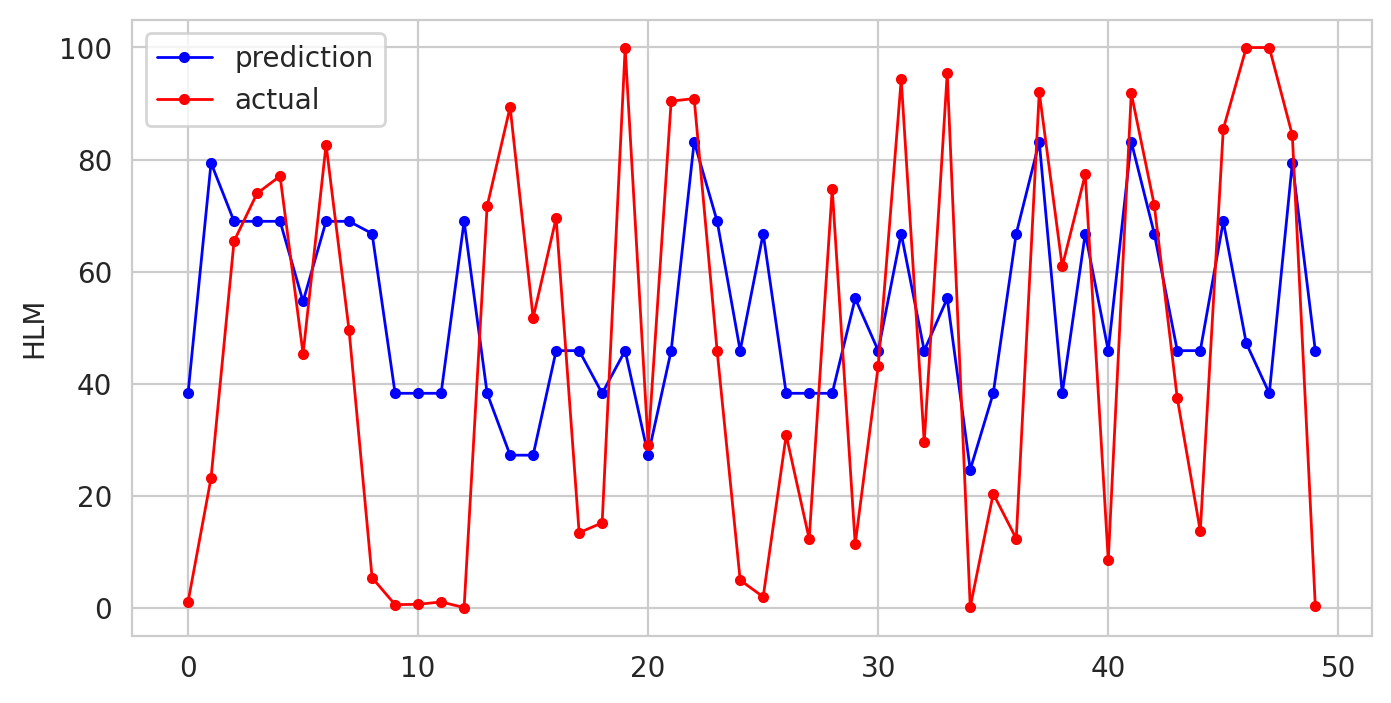

In [ ]:
######################################################################
# 결정 트리 회귀 모델
dtr = DecisionTreeRegressor(max_depth=4)
dtr.fit(Xh_train, yh_train)
y_pred = dtr.predict(Xh_test)
show_hlm(yh_test, y_pred)

HLM의 RMSE: 32.0673
HLM의 RMSE * 0.5 : 16.0336


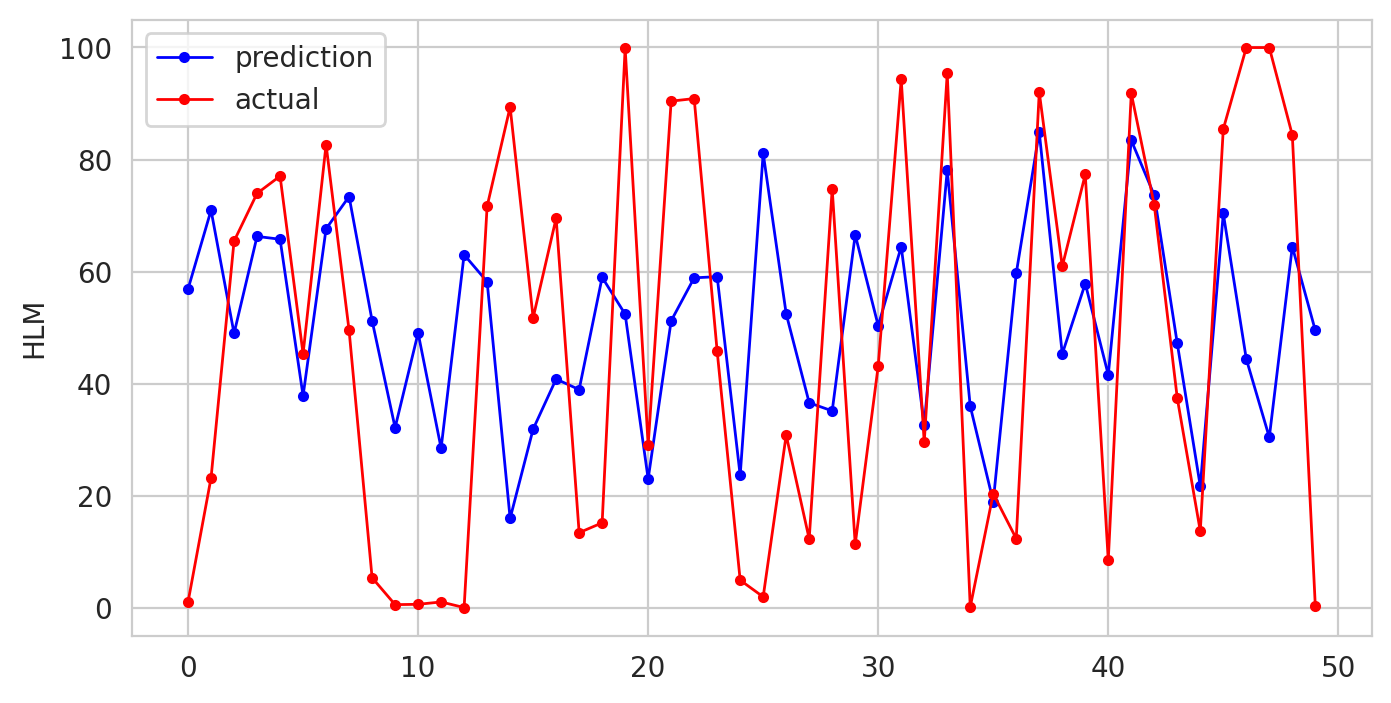

In [ ]:
######################################################################
rfr = RandomForestRegressor()
rfr.fit(Xh_train, yh_train)
y_pred = rfr.predict(Xh_test)
show_hlm(yh_test, y_pred)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000761 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1217
[LightGBM] [Info] Number of data points in the train set: 2789, number of used features: 13
[LightGBM] [Info] Start training from score 52.863330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

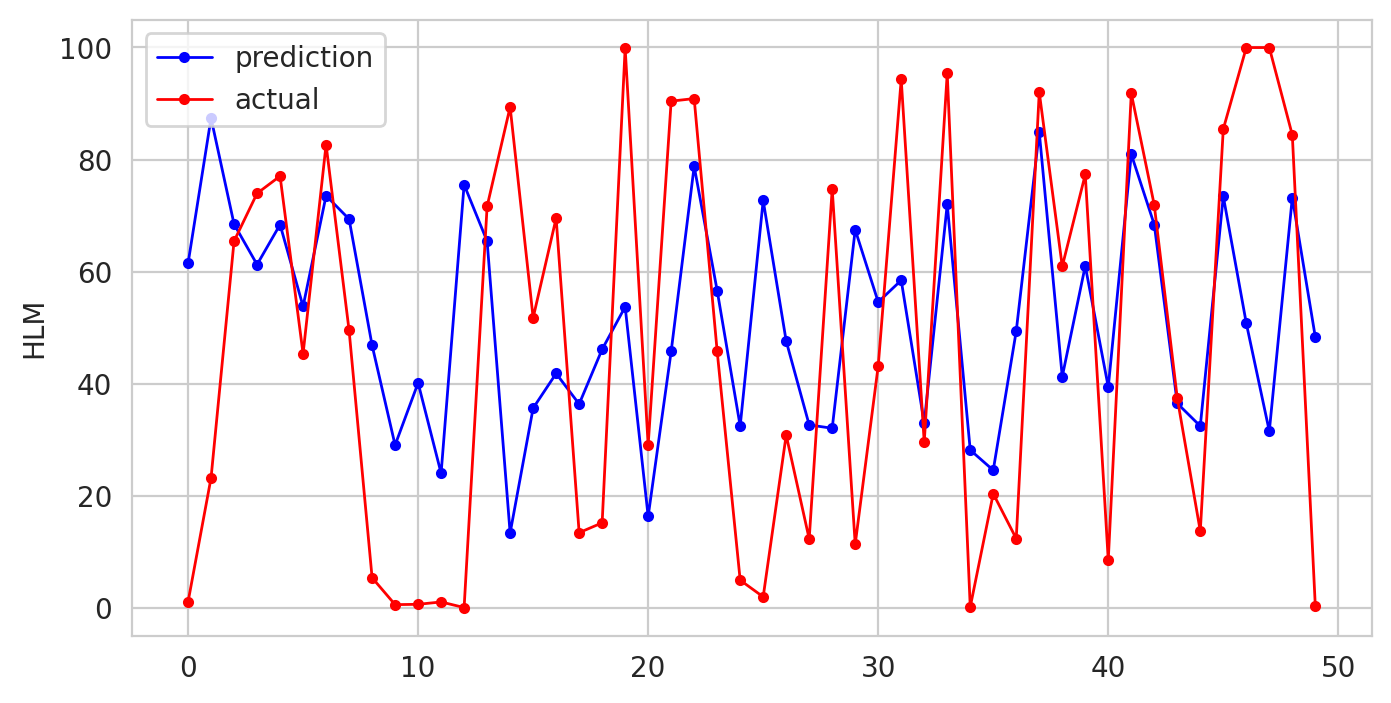

In [ ]:
######################################################################
lgbm_r = LGBMRegressor(max_depth=4)
lgbm_r.fit(Xh_train, yh_train)
y_pred = lgbm_r.predict(Xh_test)
show_hlm(yh_test, y_pred)

# Tree model 자동화

In [ ]:
def tree_model_try(X_train, X_test, y_train, y_test):
    dtr = DecisionTreeRegressor(max_depth=4)
    dtr.fit(X_train, y_train)
    y_pred = dtr.predict(X_test)
    show_hlm(y_test, y_pred)

    rfr = RandomForestRegressor()
    rfr.fit(X_train, y_train)
    y_pred = rfr.predict(X_test)
    show_hlm(y_test, y_pred)

    lgbm_r = LGBMRegressor(max_depth=4)
    lgbm_r.fit(X_train, y_train)
    y_pred = lgbm_r.predict(X_test)
    show_hlm(y_test, y_pred)
    # return dtr.predict(test_df), rfr.predict(test_df), lgbm_r.predict(test_df)

HLM의 RMSE: 33.0679
HLM의 RMSE * 0.5 : 16.534


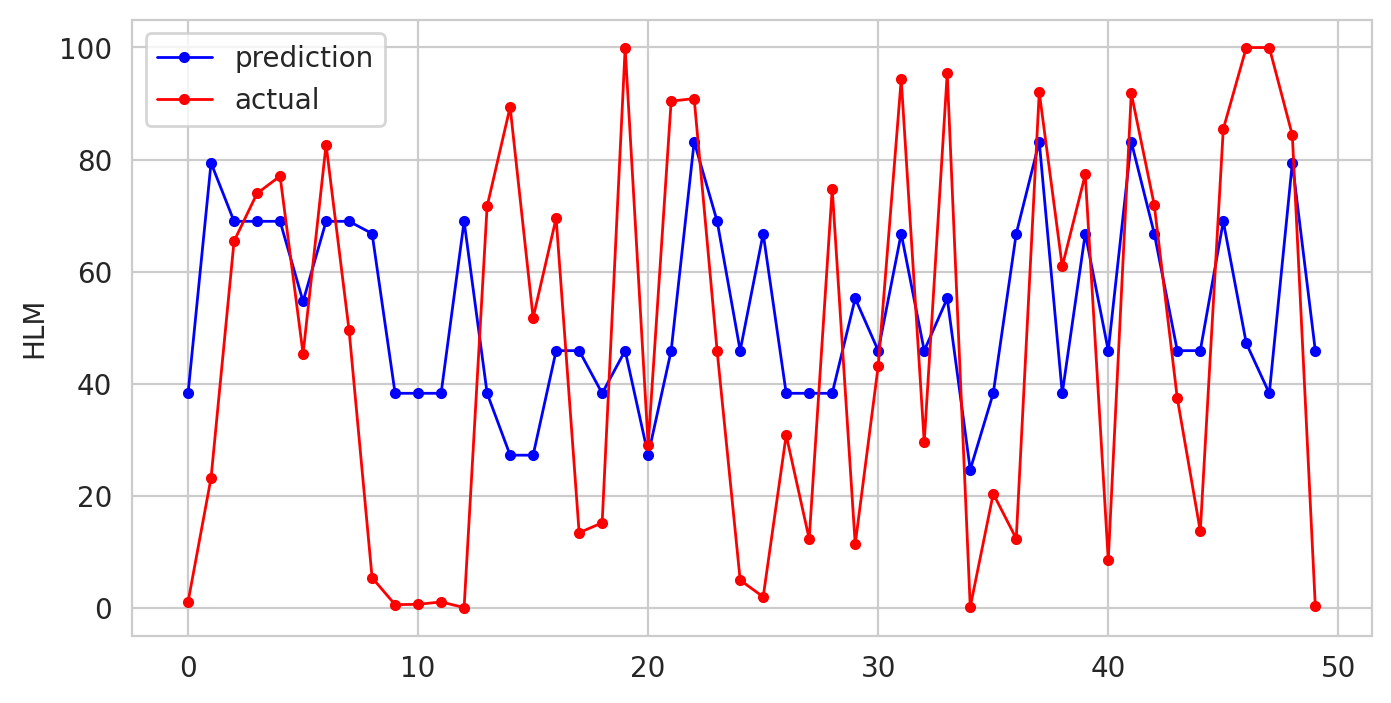

HLM의 RMSE: 32.297
HLM의 RMSE * 0.5 : 16.1485


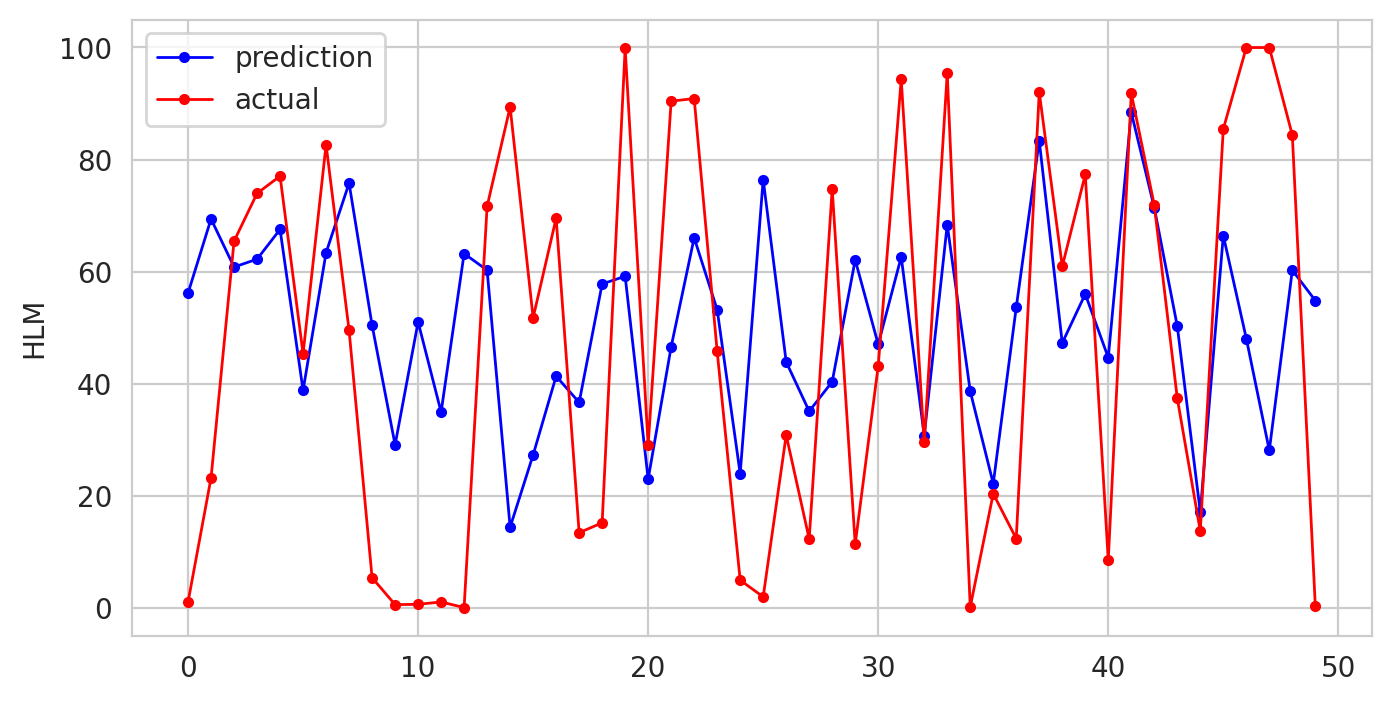

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1217
[LightGBM] [Info] Number of data points in the train set: 2789, number of used features: 13
[LightGBM] [Info] Start training from score 52.863330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

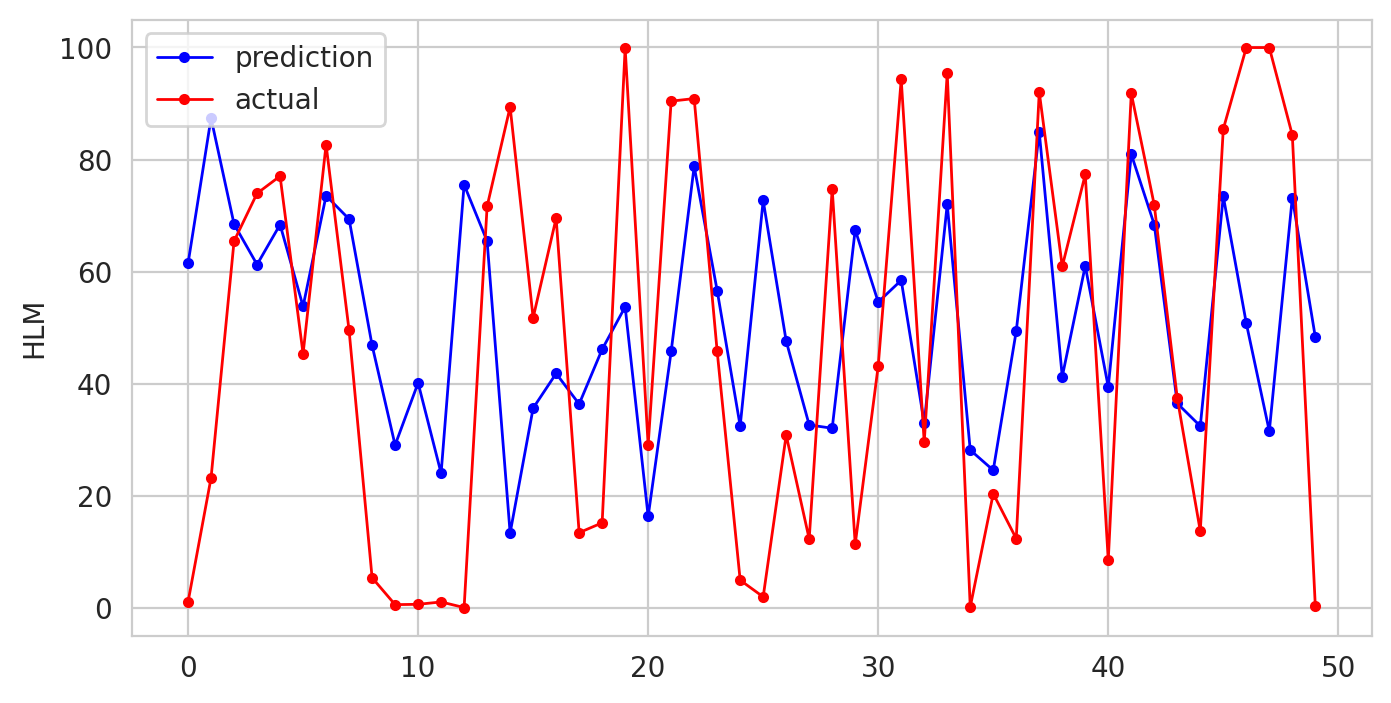

In [ ]:
tree_model_try(Xh_train, Xh_test, yh_train, yh_test)

HLM의 RMSE: 33.0507
HLM의 RMSE * 0.5 : 16.5254


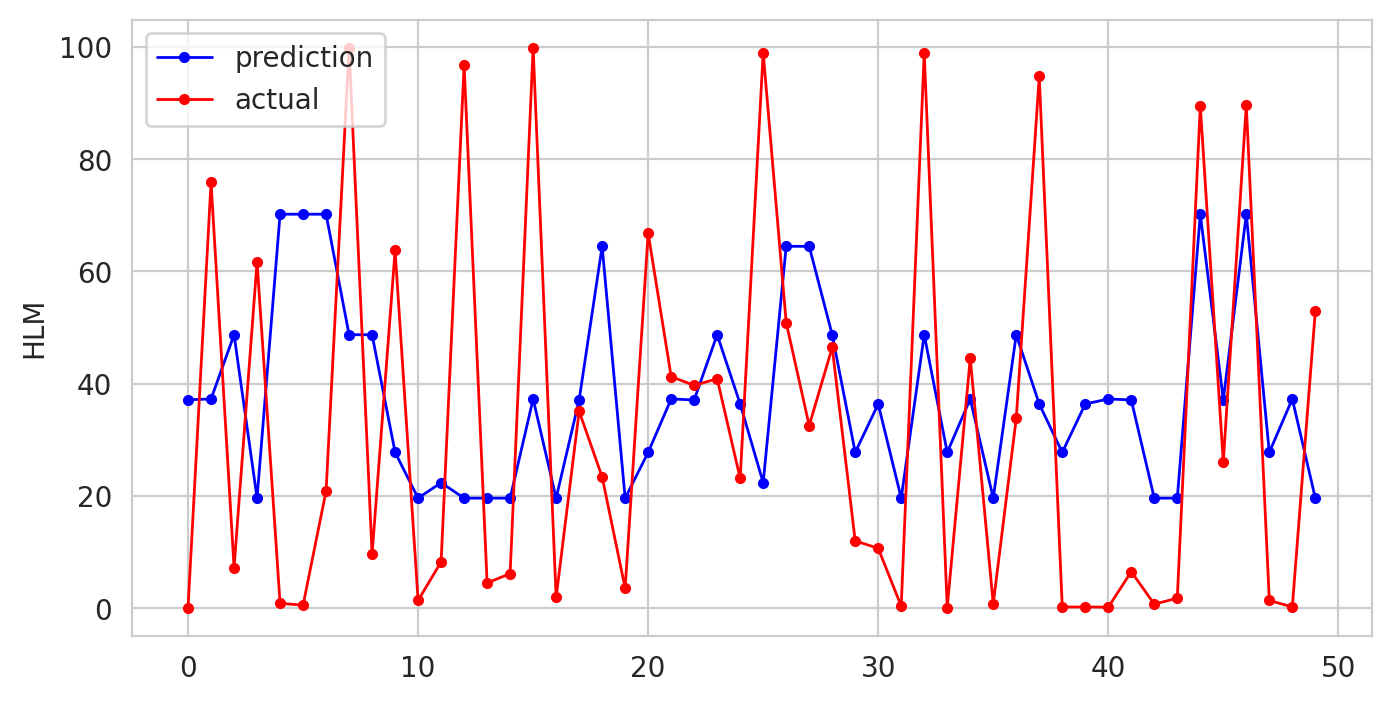

HLM의 RMSE: 32.7445
HLM의 RMSE * 0.5 : 16.3722


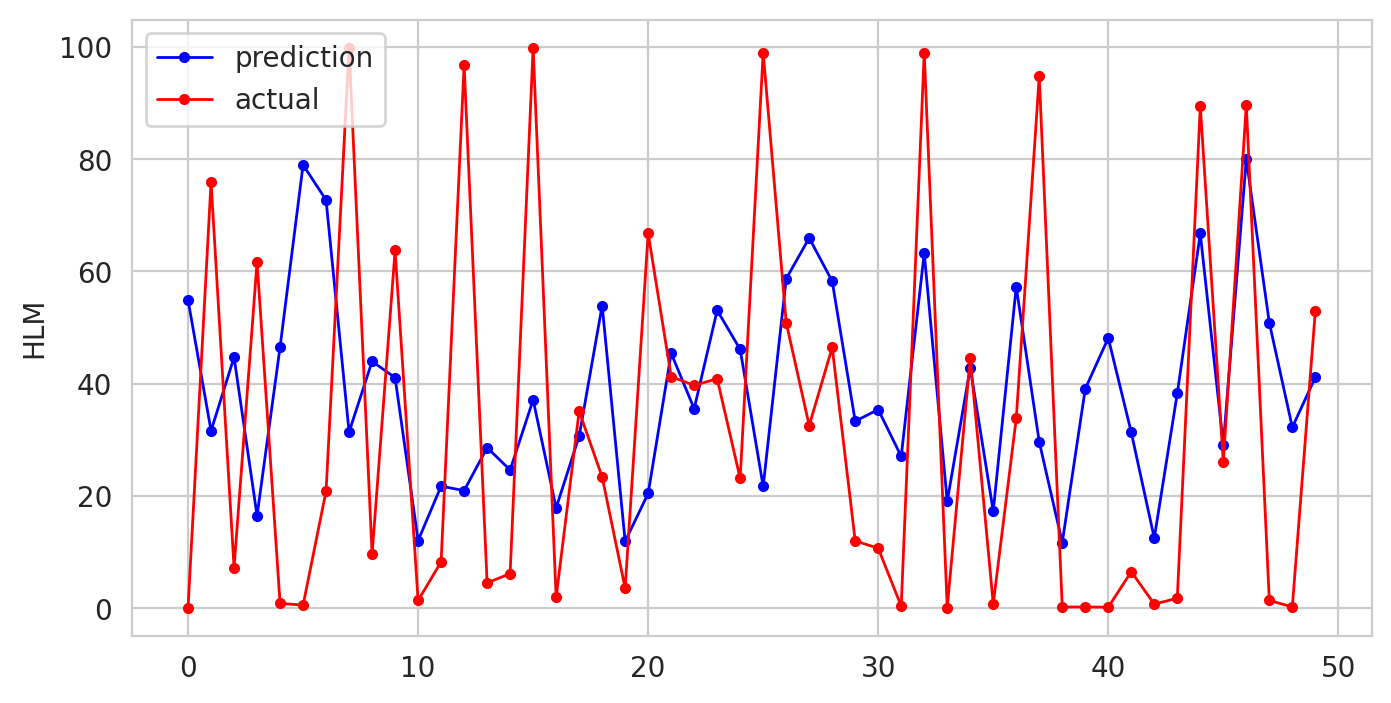

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1216
[LightGBM] [Info] Number of data points in the train set: 2789, number of used features: 13
[LightGBM] [Info] Start training from score 37.461059
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

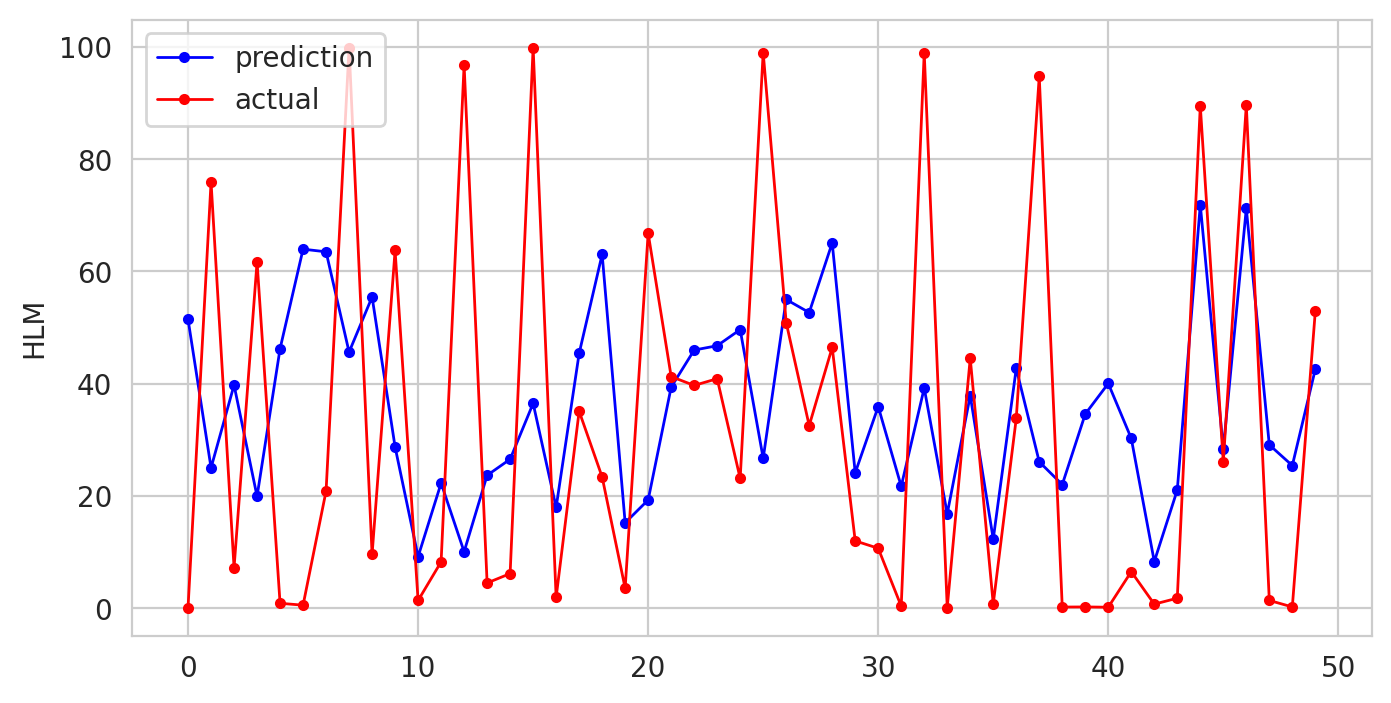

In [ ]:
tree_model_try(Xm_train, Xm_test, ym_train, ym_test)

# Test df으로 도전

In [ ]:
test_df = pd.read_csv(path + "preprocessed_test.csv")

In [ ]:
test_df[x_columns]

,Molecular_Weight,AlogP,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,num_of_atoms,num_of_heavy_atoms,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,num_of_Cl_atoms
0,361.505,2.641,4,2,7,2.635,92.76,52,25,18,1,5,0
1,370.399,0.585,5,0,3,0.585,68.31,49,27,20,5,2,0
2,347.414,4.276,4,4,5,4.290,92.86,47,26,20,1,5,0
3,345.358,1.795,5,0,2,1.795,81.21,41,26,18,1,7,0
4,353.418,1.219,4,0,2,0.169,61.15,49,26,19,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,306.443,4.207,2,1,7,4.207,55.13,52,22,18,2,2,0
479,335.398,-0.608,5,0,1,-1.736,70.16,49,24,17,4,3,0
480,349.383,1.792,3,1,3,1.792,69.72,45,26,20,3,3,0
481,341.132,0.790,3,2,2,0.423,69.64,30,20,13,3,2,0


In [13]:
def tree_model(X_train, y_train, test_df):
    dtr = DecisionTreeRegressor(max_depth=4)
    dtr.fit(X_train, y_train)

    rfr = RandomForestRegressor()
    rfr.fit(X_train, y_train)

    lgbm_r = LGBMRegressor(max_depth=4)
    lgbm_r.fit(X_train, y_train)

    return dtr.predict(test_df), rfr.predict(test_df), lgbm_r.predict(test_df)

In [ ]:
i, j, k = tree_model(Xh_train, yh_train, test_df[x_columns])

# Decision Tree 시각화

In [20]:
import graphviz
from sklearn.tree import export_graphviz

In [18]:
def tree_model_(X_train, y_train):
    dtr = DecisionTreeRegressor(max_depth=4)
    dtr.fit(X_train, y_train)

    rfr = RandomForestRegressor()
    rfr.fit(X_train, y_train)

    lgbm_r = LGBMRegressor(max_depth=4)
    lgbm_r.fit(X_train, y_train)
    return dtr, rfr, lgbm_r

In [ ]:
dtr, rfr, lgbm = tree_model_(Xh_train, yh_train)

In [37]:
dot_data = export_graphviz(dtr, out_file=None,
                feature_names=Xh_train.columns,
                class_names="HLM",
                filled=True, rounded=True, special_characters=True)

In [30]:
graph = graphviz.Source(dot_data)
graph.render("HLM_decision_tree")  # 그래프를 pdf 로 저장
graph.view()

'HLM_decision_tree.pdf'

In [ ]:
dtr_m, rfr_m, lgbm_m = tree_model_(Xm_train, ym_train)

In [38]:
dot_data = export_graphviz(dtr, out_file=None,
                feature_names=Xm_train.columns,
                class_names="MLM",
                filled=True, rounded=True, special_characters=True)

In [39]:
graph = graphviz.Source(dot_data)
graph.render("MLM_decision_tree")  # 그래프를 pdf 로 저장
graph.view()

'MLM_decision_tree.pdf'

In [48]:
import lightgbm as lgb

In [ ]:
lgbm_r = LGBMRegressor(max_depth=4)
lgbm_r.fit(Xh_train, yh_train)

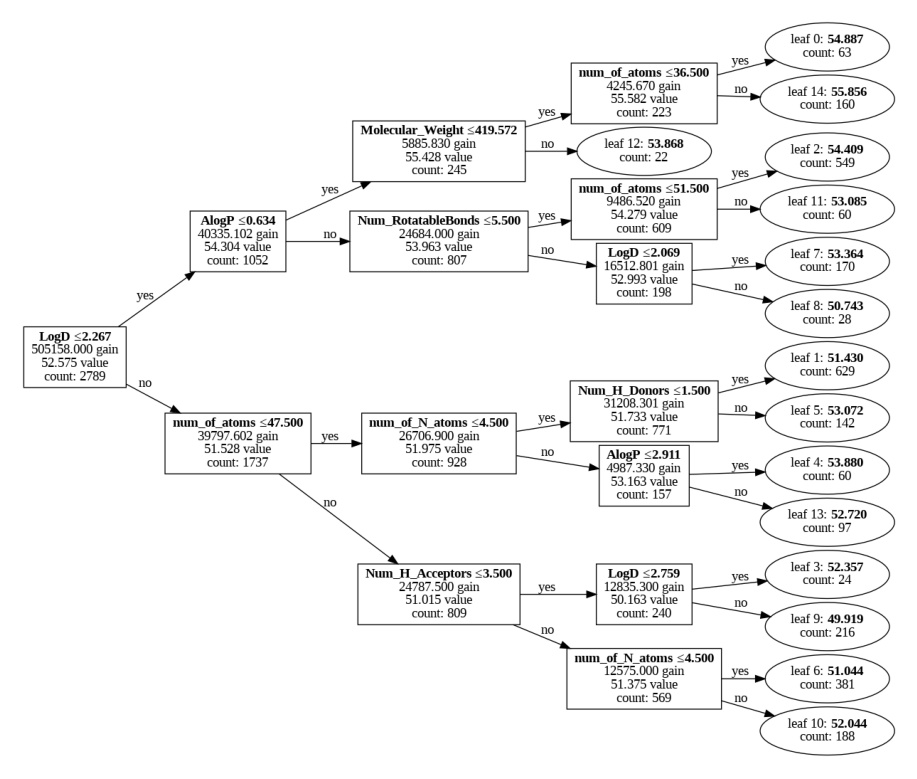

In [53]:
lgb.plot_tree(lgbm_r, tree_index=0, show_info=['split_gain', 'internal_value', 'internal_count', 'leaf_count'])
plt.show()

In [ ]:
lgbm_r = LGBMRegressor(max_depth=4)
lgbm_r.fit(Xm_train, ym_train)

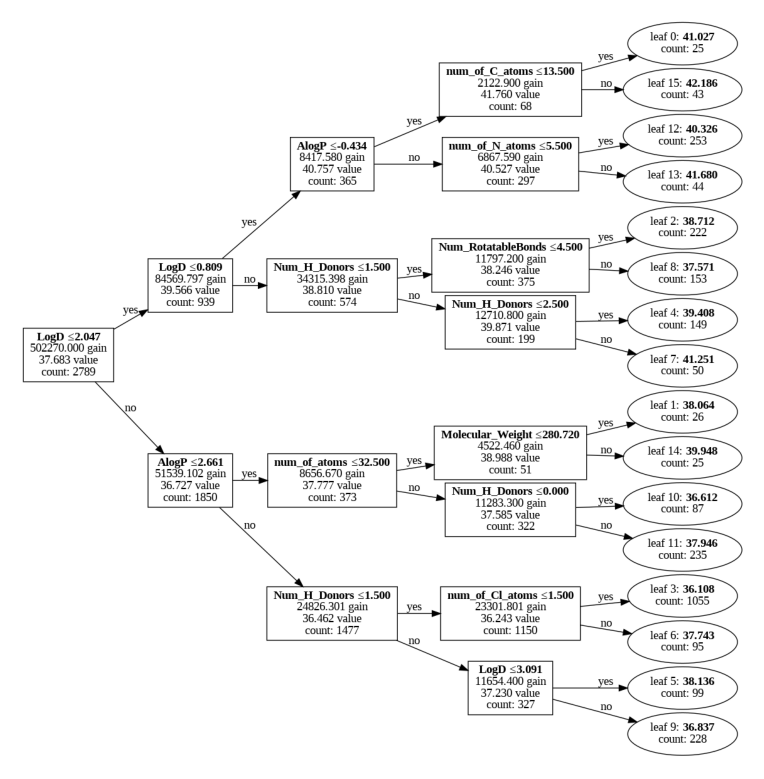

In [55]:
lgb.plot_tree(lgbm_r, tree_index=0, show_info=['split_gain', 'internal_value', 'internal_count', 'leaf_count'])
plt.show()

# 예측 평균 값

In [ ]:
def predict_mean(i, j, k):
    return (i + j + k) / 3

In [ ]:
hlm_mean = predict_mean(i, j, k)

In [ ]:
i, j, k = tree_model(Xm_train, ym_train, test_df[x_columns])
mlm_mean = predict_mean(i, j, k)

In [ ]:
##############################################
def microsome_mean(x_train, y_train, test_df):
    i, j, k = tree_model(x_train, y_train, test_df)
    return predict_mean(i, j, k)

In [ ]:
mlm_mean = microsome_mean(Xm_train, ym_train, test_df[x_columns])

In [ ]:
hlm_mean, mlm_mean

In [ ]:
######################################################################
Xh_train, Xh_test, yh_train, yh_test = train_test_split(x, yh, test_size=.2)

In [ ]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(x, ym, test_size=.2)

In [ ]:
hlm_mean2 = microsome_mean(Xh_train, yh_train, test_df[x_columns])
mlm_mean2 = microsome_mean(Xm_train, ym_train, test_df[x_columns])

In [ ]:
hlm_mean3 = microsome_mean(Xh_train, yh_train, test_df[x_columns])
mlm_mean3 = microsome_mean(Xm_train, ym_train, test_df[x_columns])

In [ ]:
hlm_mean4 = microsome_mean(Xh_train, yh_train, test_df[x_columns])
mlm_mean4 = microsome_mean(Xm_train, ym_train, test_df[x_columns])

In [ ]:
hlm_mean5 = microsome_mean(Xh_train, yh_train, test_df[x_columns])
mlm_mean5 = microsome_mean(Xm_train, ym_train, test_df[x_columns])

In [ ]:
hlm = (hlm_mean + hlm_mean2 + hlm_mean3 + hlm_mean4 + hlm_mean5) / 5
mlm = (mlm_mean + mlm_mean2 + mlm_mean3 + mlm_mean4 + mlm_mean5) / 5

In [ ]:
sub_df = pd.read_csv(path + "submission.csv")

In [ ]:
sub_df['HLM'] = hlm
sub_df['MLM'] = mlm

In [ ]:
sub_df

,id,MLM,HLM
0,TEST_000,29.762162,49.900620
1,TEST_001,60.438256,73.937079
2,TEST_002,29.287334,45.393874
3,TEST_003,52.838046,70.864941
4,TEST_004,64.122181,75.333798
...,...,...,...
478,TEST_478,9.219394,26.058742
479,TEST_479,75.468752,82.952530
480,TEST_480,44.945222,69.886123
481,TEST_481,62.705698,73.874290


In [ ]:
mlm[:5], hlm[:5]

(array([29.76216231, 60.43825579, 29.28733372, 52.83804587, 64.12218123]),
 array([49.90062043, 73.93707905, 45.39387402, 70.86494086, 75.33379785]))

In [ ]:
sub_df.to_csv(path + "submission.csv", index=False, encoding='utf-8-sig')